## Cluster Analysis

In [1]:
import sys
import os

%run ../data_preparation.ipynb
%store -r merged_df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sc
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Stored 'merged_df' (DataFrame)


### Data preparation
- drop IDs & not needed columns and convert time values into hours
- Create sample from dataset as original dataset is very big

In [2]:
dropped_df = merged_df.copy()

dropped_df.drop('id', axis=1, inplace=True)
dropped_df.drop('siteID', axis=1, inplace=True)
dropped_df.drop('spaceID', axis=1, inplace=True)
dropped_df.drop('userID', axis=1, inplace=True)
dropped_df.drop('modifiedAt', axis=1, inplace=True)
dropped_df.drop('requestedDeparture', axis=1, inplace=True)
dropped_df.drop('WhPerMile', axis=1, inplace=True)
dropped_df['connectionTime'] =  dropped_df['connectionTime'].dt.hour
dropped_df['disconnectTime'] =  dropped_df['disconnectTime'].dt.hour
dropped_df['doneChargingTime'] =  dropped_df['doneChargingTime'].dt.hour
dropped_df = dropped_df.dropna()

dropped_df = dropped_df.sample(n=3_000, random_state=42)

### Scale data

c:\Users\Emma Lux\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


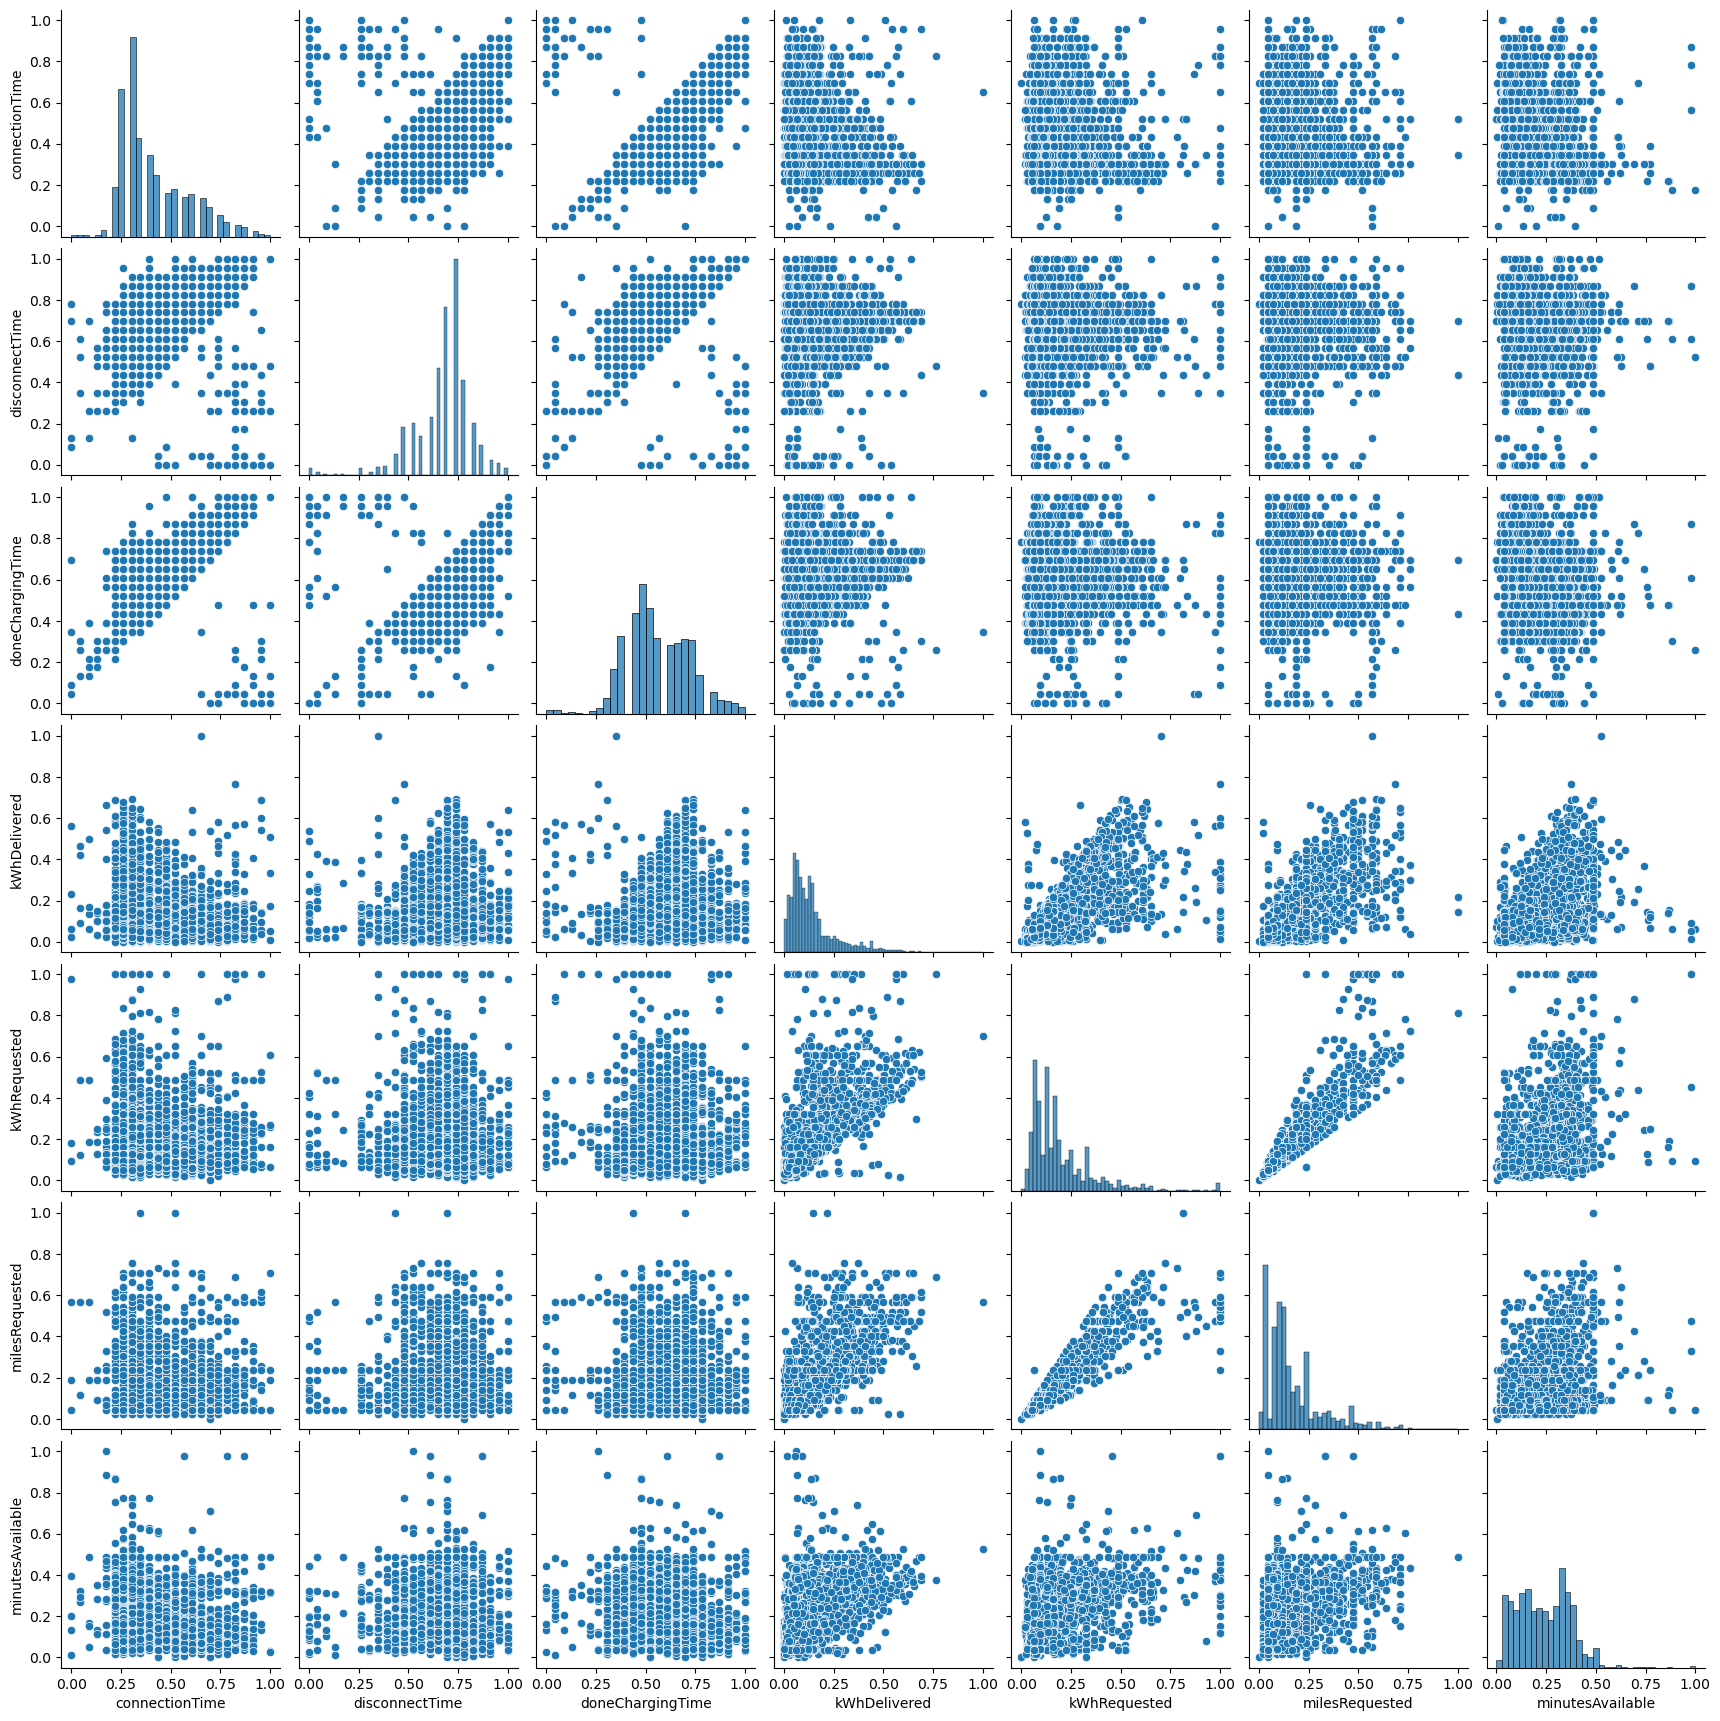

In [3]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dropped_df)
scaled_df = pd.DataFrame(scaled, columns=dropped_df.columns, index=dropped_df.index)

sns.pairplot(data=scaled_df)

### How many clusters should we use?
1. Plot residual loss for different number of clusters, find 'elbow' and select corresponding number of clusters
2. Use hierarchical clustering to detect suitable braching and corresponding number of clusters

### Residual loss plot -> number of clusters between 2 and 5

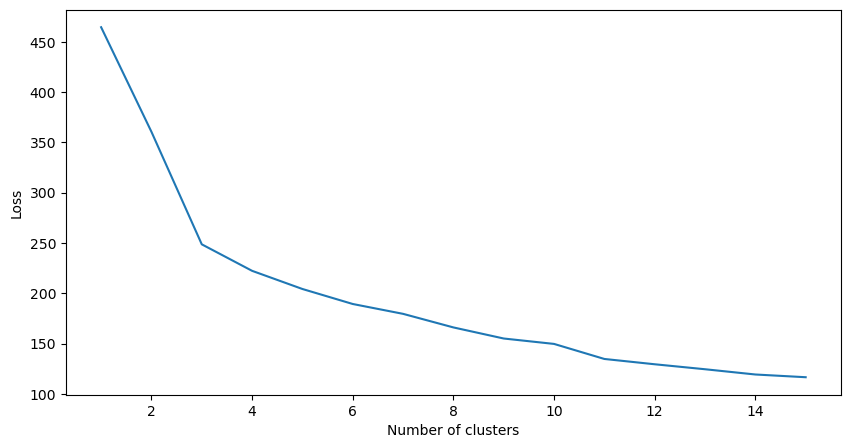

In [4]:
k_max = 15
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.figure(figsize=(10, 5))  
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

### Hierarchal Clustering -> number of clusters = 3

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [122.5, 122.5, 152.5, 152.5],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [137.5, 137.5, 191.25, 191.25],
  [90.0, 90.0, 164.375, 164.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [310.0, 310.0, 333.75, 333.75],
  [365.0, 365.0, 375.0, 

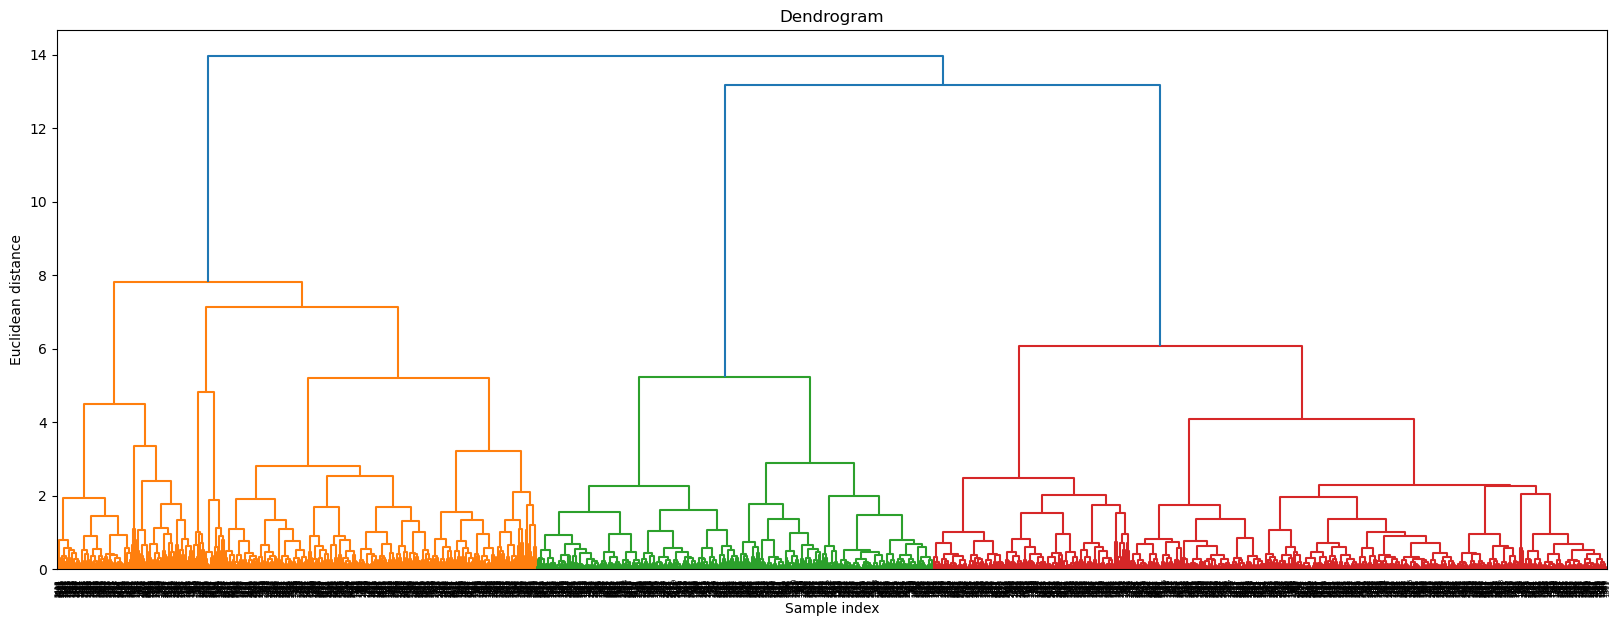

In [5]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
sc.dendrogram(sc.linkage(scaled, method='ward'))

### K Means with 3 clusters

c:\Users\Emma Lux\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


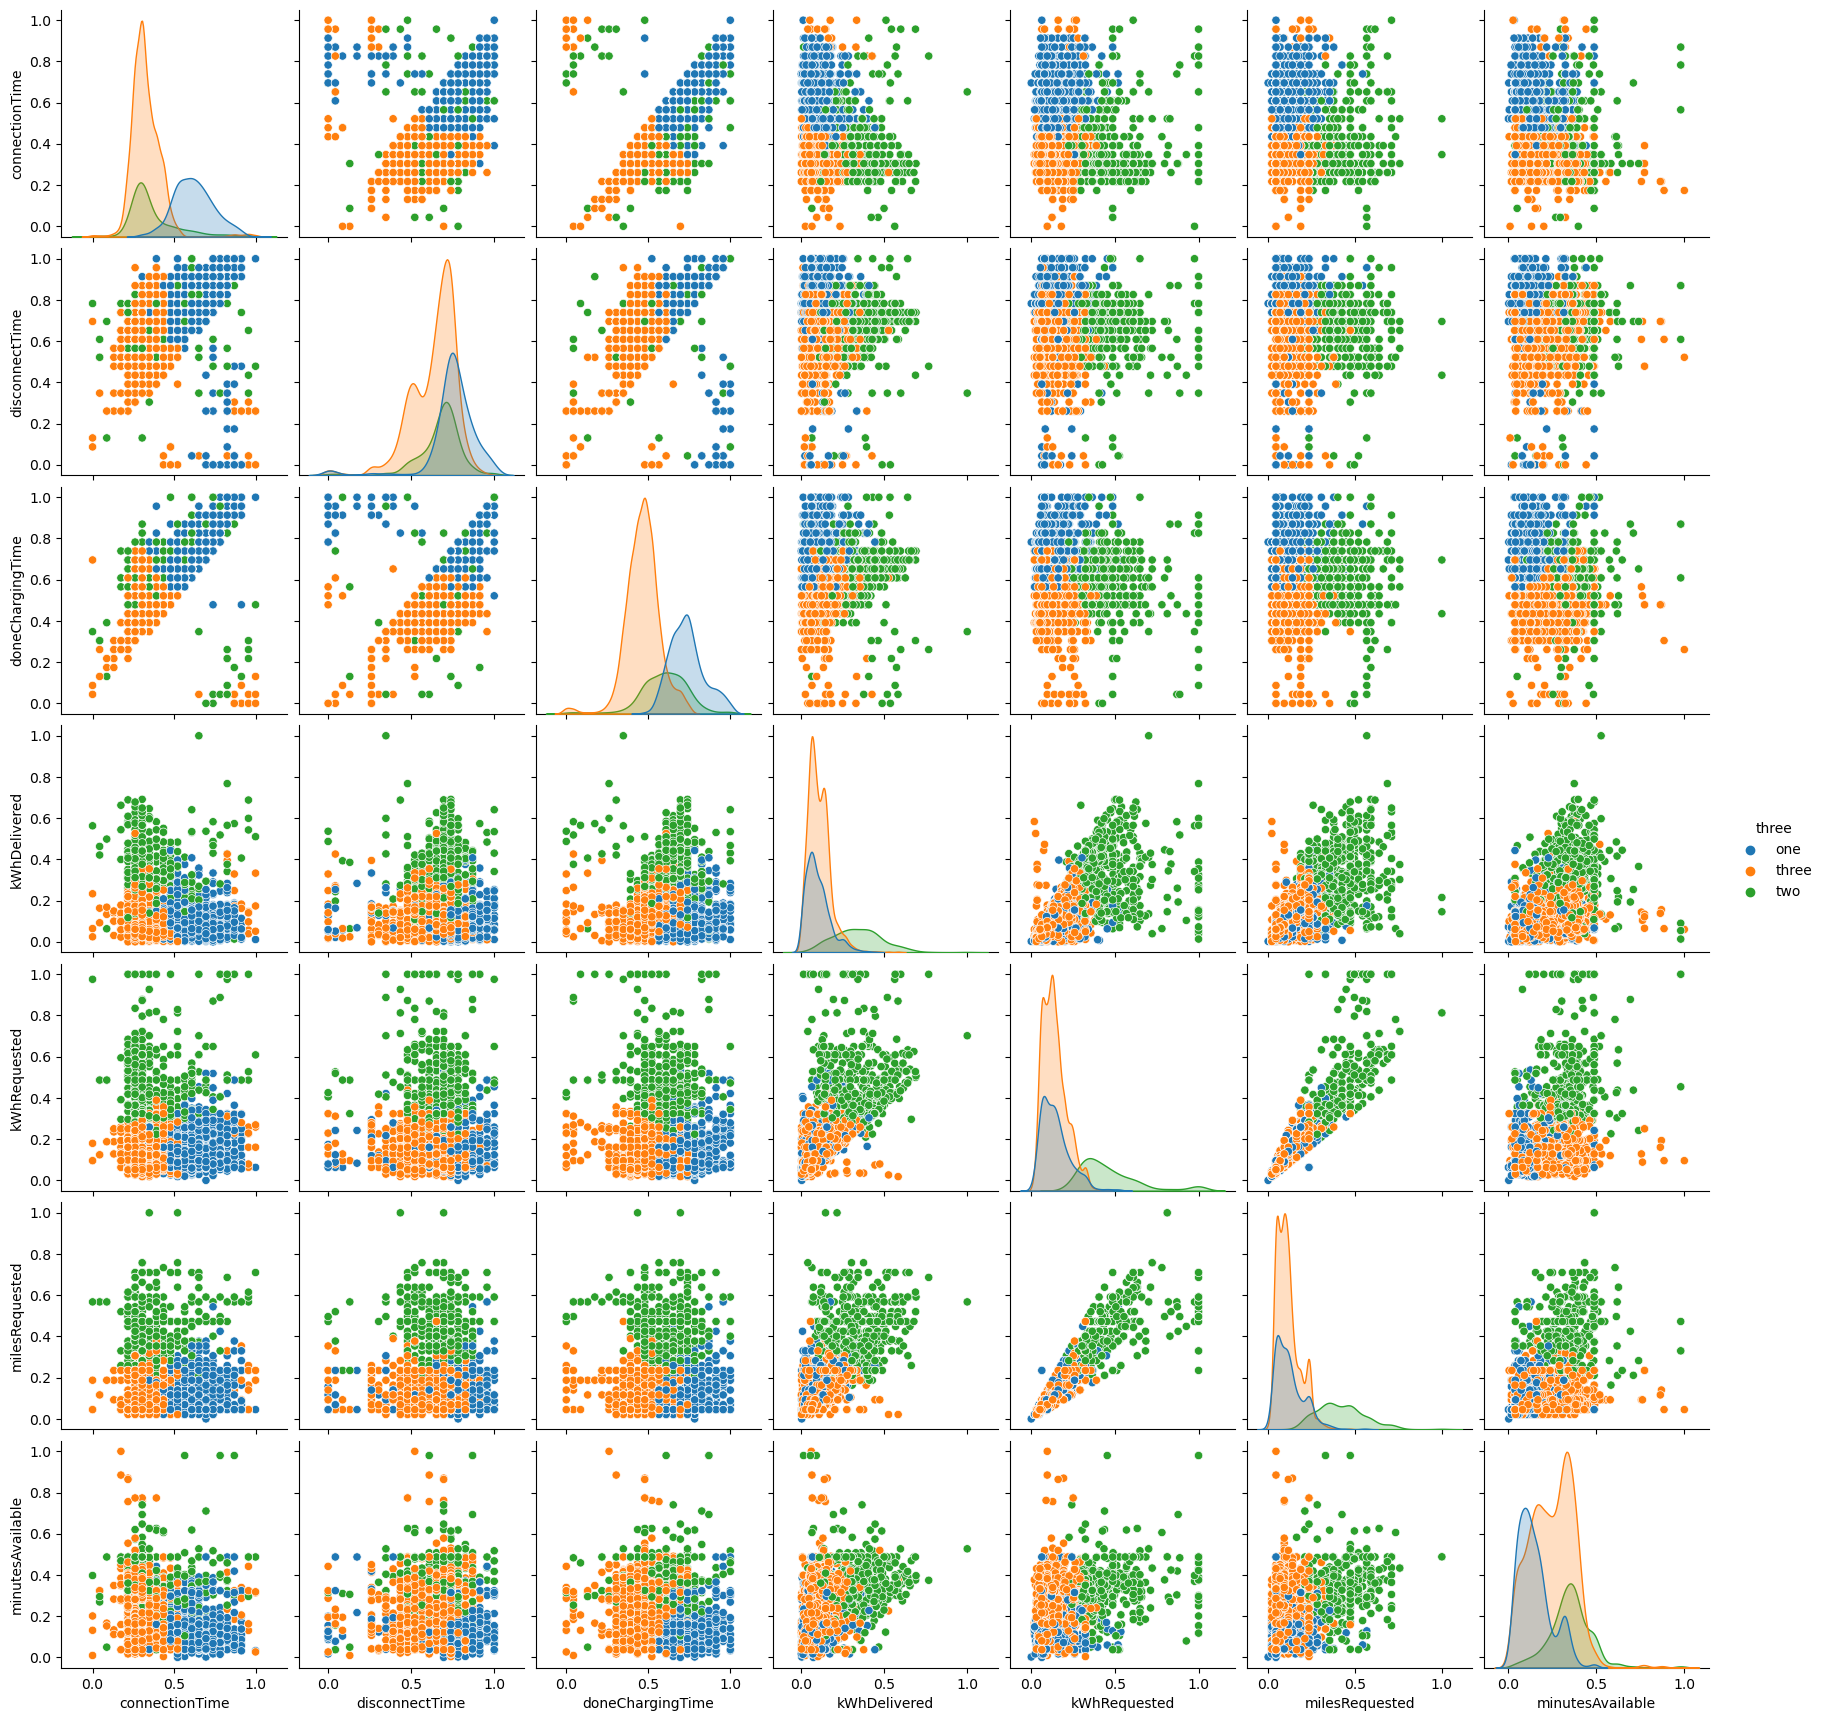

In [6]:
numbers = ["one", "two", "three"]
three_means = KMeans(n_clusters=3, n_init='auto')
three_means.fit(scaled)

# match records to clusters by calling predict
three_means.predict(scaled)
scaled_df["three"] = three_means.predict(scaled)
scaled_df["three"] = scaled_df["three"].apply(lambda x: numbers[x])

sns.pairplot(data=scaled_df, hue="three")